<a href="https://colab.research.google.com/github/ywirot/image1/blob/main/Image_Resizing_and_Rotation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ตัวอย่าง Streamlit - https://basic-image-processing-course-03.streamlit.app/

In [ ]:
from skimage import transform
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

#สร้าง Function ที่จำเป็น

In [ ]:
# -------------------------------
# ฟังก์ชันโหลดภาพจาก URL
# -------------------------------
def load_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert("RGB")
    return np.array(img)

# -------------------------------
# ฟังก์ชัน Flip
# -------------------------------
def flip_image(image, direction):
    if direction == "Horizontal":
        return np.fliplr(image)
    elif direction == "Vertical":
        return np.flipud(image)
    else:
        return image

# -------------------------------
# ฟังก์ชันแสดง histogram
# -------------------------------
def plot_histogram(image):
    fig, ax = plt.subplots()
    if image.ndim == 3 and image.shape[2] == 3:
        for i, color in enumerate(['red', 'green', 'blue']):
            ax.plot(np.histogram(image[:, :, i], bins=256, range=(0, 1))[0], label=color)
        ax.legend()
        ax.set_title("Histogram (RGB Channels)")
    else:
        ax.hist(image.ravel(), bins=256, color='gray')
        ax.set_title("Histogram (Grayscale)")
    return fig


ภาพต้นฉบับ (Original Image with Axes)


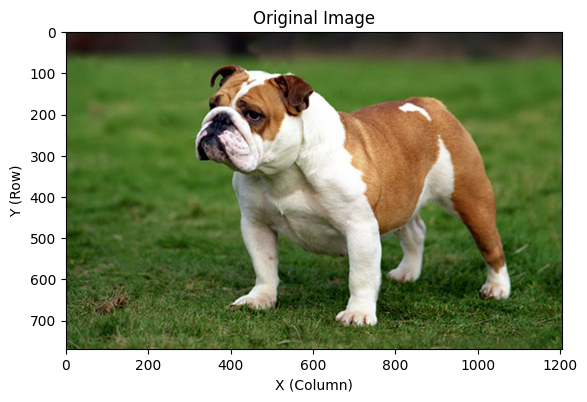

In [ ]:
# -------------------------------
# URLs ของภาพตัวอย่าง
# -------------------------------
image_options = {
    "Dog": "https://upload.wikimedia.org/wikipedia/commons/b/bf/Bulldog_inglese.jpg",
    "Cat": "https://cdn.britannica.com/39/226539-050-D21D7721/Portrait-of-a-cat-with-whiskers-visible.jpg"
}

# แสดงภาพต้นฉบับ
print("ภาพต้นฉบับ (Original Image with Axes)")
image = load_image_from_url(image_options["Dog"])

fig_orig, ax_orig = plt.subplots()
ax_orig.imshow(image)
ax_orig.set_title("Original Image")
ax_orig.set_xlabel("X (Column)")
ax_orig.set_ylabel("Y (Row)")
plt.show()

In [ ]:
#แสดงรูปภาพ
def show_image(image):
  plt.title("Image")
  plt.imshow(image)
  plt.show()

##Resize

ปรับขนาด (Resize Image)


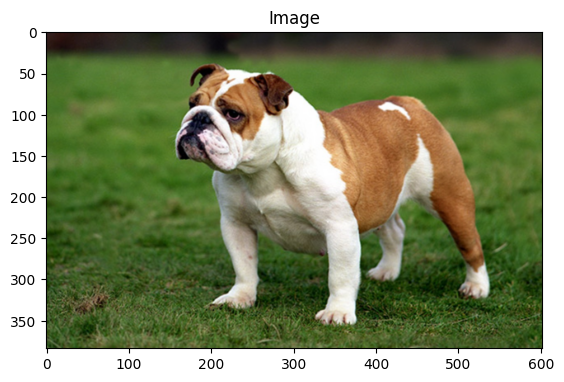

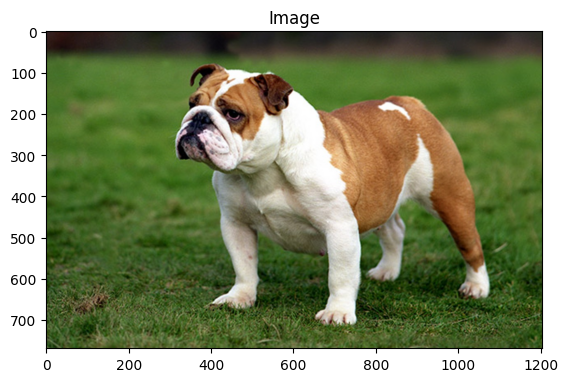

In [ ]:
# ----------------------------
# Resize
# ----------------------------
print("ปรับขนาด (Resize Image)")
resize_scale = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]

resized_image = transform.rescale(image, resize_scale[0], channel_axis=2, anti_aliasing=True)
show_image(resized_image)

resized_image = transform.rescale(image, resize_scale[5], channel_axis=2, anti_aliasing=True)
show_image(resized_image)

##Rotation

หมุนภาพ (Rotate Image)


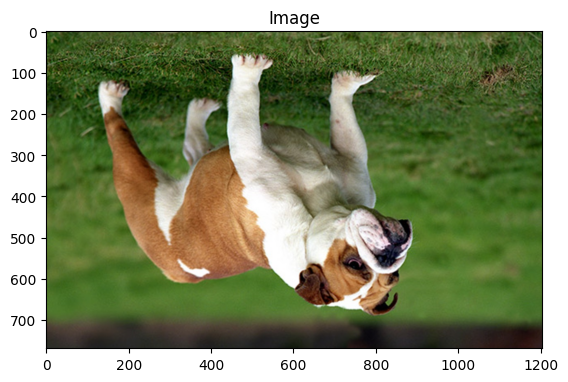

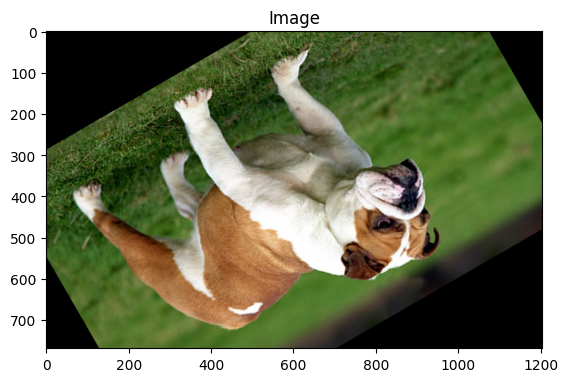

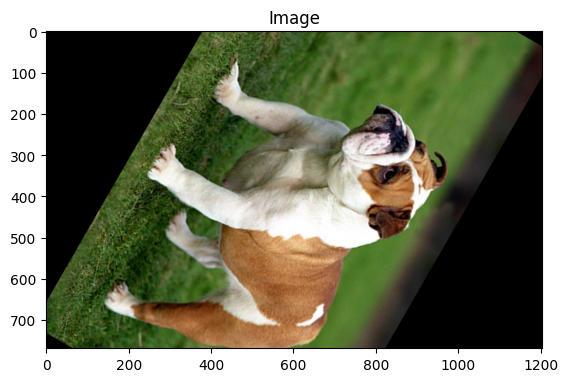

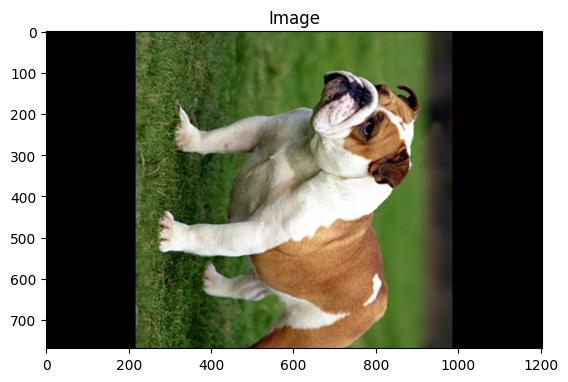

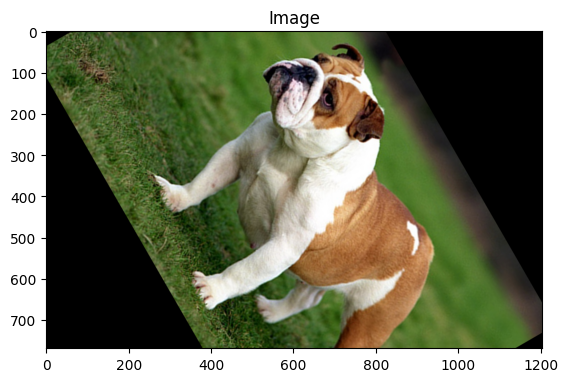

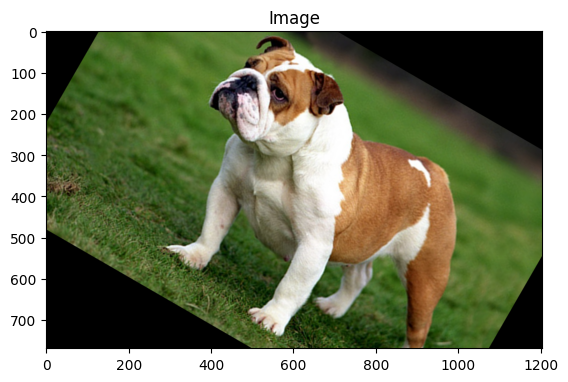

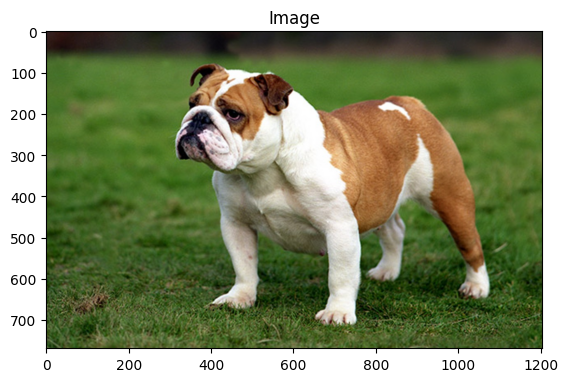

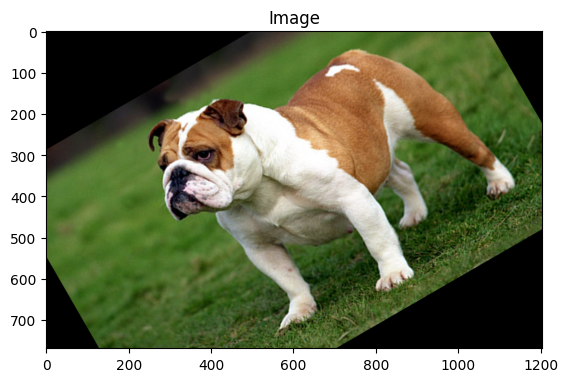

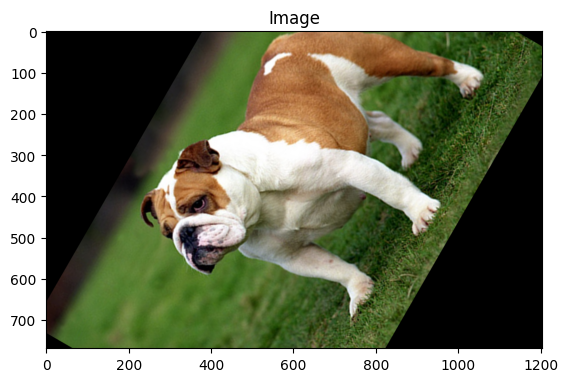

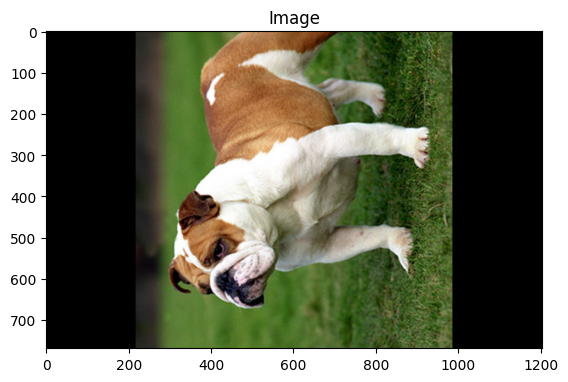

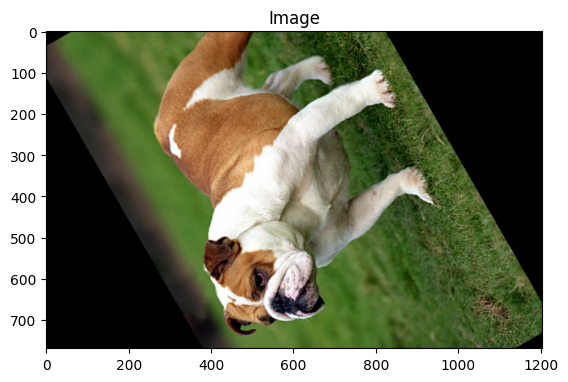

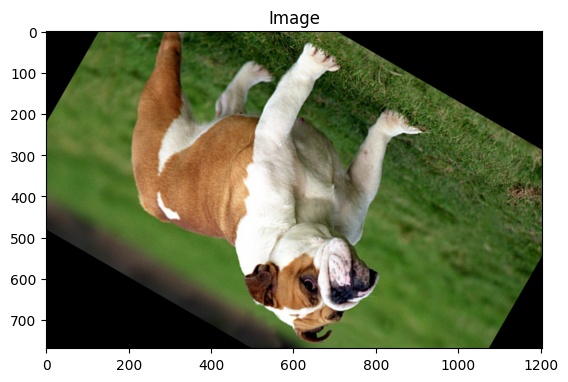

In [ ]:
# ----------------------------
# Rotate
# ----------------------------
print("หมุนภาพ (Rotate Image)")
angle_scale = range(-180,180,30)

for angle in angle_scale:
  rotated_image = transform.rotate(resized_image, angle)
  show_image(rotated_image)

##Flip

กลับภาพ (Flip Image)


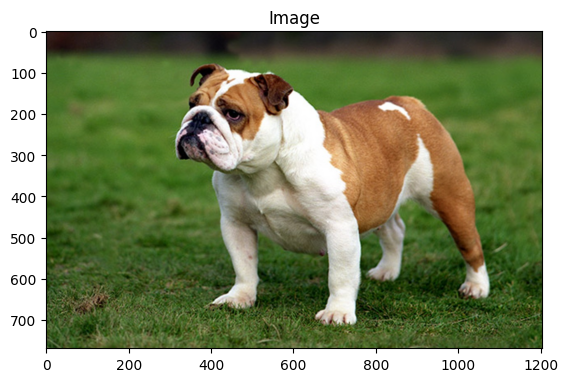

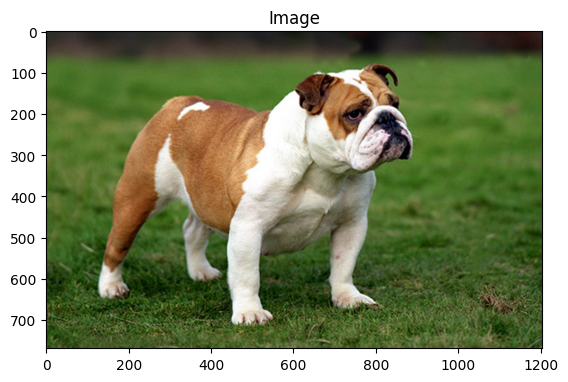

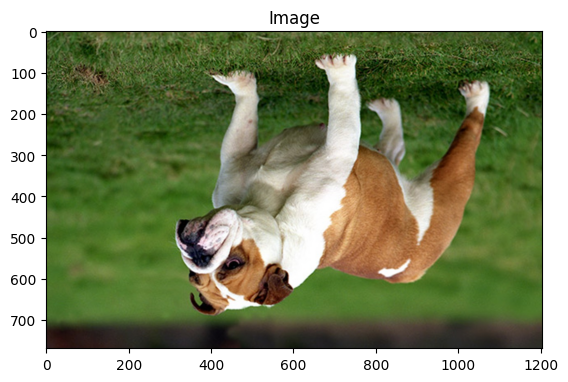

In [ ]:
# ----------------------------
# Flip
# ----------------------------
print("กลับภาพ (Flip Image)")
flip_option = ["None", "Horizontal", "Vertical"]

for flip in flip_option:
  final_image = flip_image(image, flip)
  show_image(final_image)

# สร้าง Streamlit Application

In [ ]:
%%writefile requirements.txt

streamlit
scikit-image>=0.19.3
matplotlib
pillow
requests

In [ ]:
%%writefile app_2.py

#image_options = {
#    "Dog": "https://upload.wikimedia.org/wikipedia/commons/b/bf/Bulldog_inglese.jpg",
#    "Cat": "https://cdn.britannica.com/39/226539-050-D21D7721/Portrait-of-a-cat-with-whiskers-visible.jpg"
#}

import streamlit as st
from skimage import transform
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

# -------------------------------
# ฟังก์ชันโหลดภาพจาก URL
# -------------------------------
def load_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert("RGB")
    return np.array(img)

# -------------------------------
# ฟังก์ชัน Flip
# -------------------------------
def flip_image(image, direction):
    if direction == "Horizontal":
        return np.fliplr(image)
    elif direction == "Vertical":
        return np.flipud(image)
    else:
        return image

# -------------------------------
# ฟังก์ชันแสดง histogram
# -------------------------------
def plot_histogram(image):
    fig, ax = plt.subplots()
    if image.ndim == 3 and image.shape[2] == 3:
        for i, color in enumerate(['red', 'green', 'blue']):
            ax.plot(np.histogram(image[:, :, i], bins=256, range=(0, 1))[0], label=color)
        ax.legend()
        ax.set_title("Histogram (RGB Channels)")
    else:
        ax.hist(image.ravel(), bins=256, color='gray')
        ax.set_title("Histogram (Grayscale)")
    return fig

# -------------------------------
# URLs ของภาพตัวอย่าง
# -------------------------------
image_options = {
    "Dog": "https://upload.wikimedia.org/wikipedia/commons/b/bf/Bulldog_inglese.jpg",
    "Cat": "https://cdn.britannica.com/39/226539-050-D21D7721/Portrait-of-a-cat-with-whiskers-visible.jpg"
}

# -------------------------------
# ส่วน UI
# -------------------------------
st.title("Interactive Image Processing with scikit-image")

st.subheader("เลือกภาพตัวอย่าง")
cols = st.columns(2)

for i, (label, url) in enumerate(image_options.items()):
    with cols[i]:
        st.image(url, caption=label, width=200)
        if st.button(f"เลือก {label}"):
            st.session_state.original_image = load_image_from_url(url)
            st.session_state.reset = True  # trigger reset

# -------------------------------
# ถ้ามีภาพที่โหลดแล้ว
# -------------------------------
if 'original_image' in st.session_state:
    if 'reset' not in st.session_state or st.session_state.reset:
        st.session_state.resize_scale = 1.0
        st.session_state.angle = 0
        st.session_state.flip_option = "None"
        st.session_state.reset = False

    image = st.session_state.original_image

    # แสดงภาพต้นฉบับ
    st.subheader("ภาพต้นฉบับ (Original Image with Axes)")
    fig_orig, ax_orig = plt.subplots()
    ax_orig.imshow(image)
    ax_orig.set_title("Original Image")
    ax_orig.set_xlabel("X (Column)")
    ax_orig.set_ylabel("Y (Row)")
    st.pyplot(fig_orig)

    # ----------------------------
    # Resize
    # ----------------------------
    st.subheader("ปรับขนาด (Resize Image)")
    resize_scale = st.slider("ปรับขนาด (0.1 = เล็กลง, 2.0 = ใหญ่ขึ้น)", 0.1, 2.0, st.session_state.resize_scale, step=0.1)
    st.session_state.resize_scale = resize_scale
    resized_image = transform.rescale(image, resize_scale, channel_axis=2, anti_aliasing=True)

    # ----------------------------
    # Rotate
    # ----------------------------
    st.subheader("หมุนภาพ (Rotate Image)")
    angle = st.slider("เลือกองศาในการหมุน", -180, 180, st.session_state.angle)
    st.session_state.angle = angle
    rotated_image = transform.rotate(resized_image, angle)

    # ----------------------------
    # Flip
    # ----------------------------
    st.subheader("กลับภาพ (Flip Image)")
    flip_option = st.selectbox("เลือกการกลับภาพ", ["None", "Horizontal", "Vertical"], index=["None", "Horizontal", "Vertical"].index(st.session_state.flip_option))
    st.session_state.flip_option = flip_option
    final_image = flip_image(rotated_image, flip_option)

    # -------------------------------
    # รีเซ็ตค่าหากกดปุ่ม reset
    # -------------------------------
    if st.button("รีเซ็ต Transformation"):
        st.session_state.reset = True

    # ----------------------------
    # แสดงภาพผลลัพธ์
    # ----------------------------
    st.subheader("ผลลัพธ์ภาพหลังการแปลง (Transformed Image with Axes)")
    fig, ax = plt.subplots()
    ax.imshow(final_image)
    ax.set_title("Transformed Image")
    ax.set_xlabel("X (Column)")
    ax.set_ylabel("Y (Row)")
    st.pyplot(fig)

    # ----------------------------
    # แสดง Histogram
    # ----------------------------
    st.subheader("Histogram ของภาพหลังการแปลง")
    hist_fig = plot_histogram(final_image)
    st.pyplot(hist_fig)